In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df = df.drop(columns=['Loan_ID'],axis=0)

In [10]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
datamapping = {'Gender':    {"Female":0, "Male": 1},
               'Education':    {"Graduate":0, "Not Graduate": 1},
               'Married': {"Yes":0, "No": 1},
               'Self_Employed': {"Yes":0, "No": 1},
               'Dependents': {"3+":3},
               'Loan_Status': {"Y":0, "N": 1},
               'Property_Area': {"Urban":0,"Rural":1, "Semiurban":2}}
df = df.replace(datamapping)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,1,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,0
3,1,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
4,1,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
5,1,0,2,0,0,5417,4196.0,267.0,360.0,1.0,0,0


In [13]:
y = df["Loan_Status"]
X = df.drop(["Loan_Status"], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)

<BarContainer object of 480 artists>

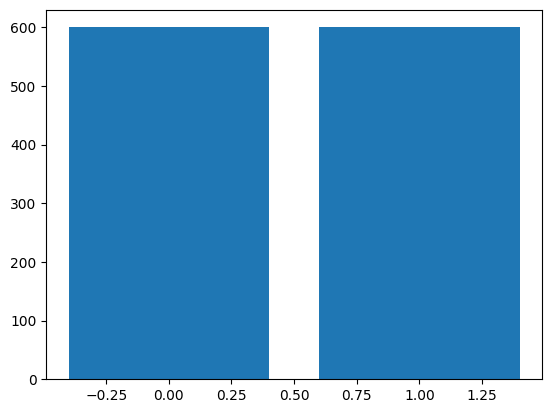

In [31]:
plt.bar(df['Gender'], df['LoanAmount'])

In [1]:
#plt.pie(df['Loan_Status'],df['Gender'])

C:\Users\gadde\AppData\Local\Temp\ipykernel_13932\3331098123.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_corr.corr()


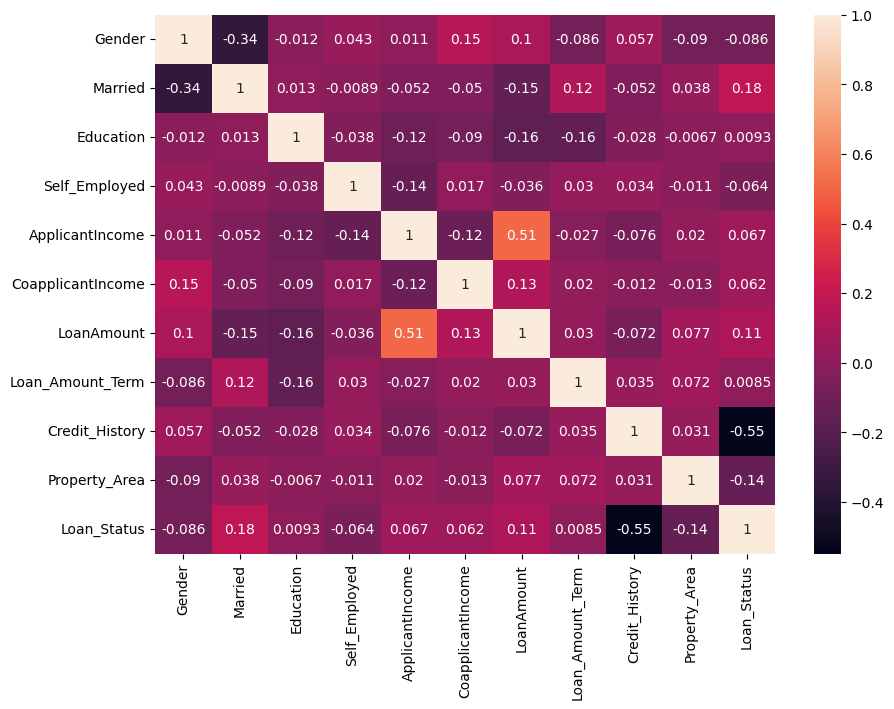

In [33]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [17]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,1,1,0,0,1,3158,3053.0,89.0,360.0,1.0,1
496,1,0,0,1,1,2600,1700.0,107.0,360.0,1.0,1
552,1,0,1,0,1,3333,3250.0,158.0,360.0,1.0,0
402,1,1,0,0,1,2500,20000.0,103.0,360.0,1.0,2
144,1,0,2,0,1,11757,0.0,187.0,180.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
78,1,0,3,0,1,3167,4000.0,180.0,300.0,0.0,2
417,1,0,2,0,0,1600,20000.0,239.0,360.0,1.0,0
430,0,1,1,0,0,8624,0.0,150.0,360.0,1.0,2
13,1,1,0,0,1,1853,2840.0,114.0,360.0,1.0,1


In [18]:
y_train

285    0
496    0
552    0
402    0
144    0
      ..
78     1
417    1
430    0
13     1
450    1
Name: Loan_Status, Length: 336, dtype: int64

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test,pred))

[[83 17]
 [33 11]]


In [22]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 65.28%


In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test,pred))


[[83 17]
 [33 11]]


C:\Users\gadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 74.31%


In [25]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
predictions=svc_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))

[[98  2]
 [30 14]]


In [26]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 77.78%
